# Generating NSF-AI Polytope Figure
We want to run this experiment for given ML models trained on given datasets over varying sample size between given polytope numbers

- Do this for [RF, DN] with [XOR, RXOR, NXOR] over different sample size between [4, 64] polytopes

General process would be to repeat experiment over different sample size to make a plot of risk vs sample size

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from matplotlib.path import Path
import random
import warnings
warnings.filterwarnings('ignore')
# from scipy.spatial import Voronoi, voronoi_plot_2d

from util import true_xor, generate_mask, generate_gaussian_parity
# from util import generate_polytope, calculate_risks, voronoi_finite_polygons_2d
from util import get_polytope_points

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

#### Test parameters

In [2]:
seed = 1234 #random seed
rng = 1 #data range
h = 0.02 #grid sparsity
poly = [4, 64] #polytope number
N = [1000, 2000, 5000, 10000, 50000] #sample size
dtypes = ['XOR', 'RXOR', 'NXOR']
mtypes = ['RF', 'MLP']

In [3]:
grid = generate_mask(rng=rng, h=h)

In [4]:
# training set / test set generation
def generate_data(N):
    data = [
        generate_gaussian_parity(n_samples=N),
        generate_gaussian_parity(n_samples=N, angle_params=np.pi/4),
        generate_gaussian_parity(n_samples=N, angle_params=np.pi/2)
    ]

    return data

In [41]:
train = generate_data(N=1000)
test = generate_data(N=1000)

In [42]:
def train_models(X, y, grid):
    clf_rf = RandomForestClassifier()
    clf_mlp = MLPClassifier()

    clf_rf.fit(X,y)
    clf_mlp.fit(X,y)

    pred_rf = clf_rf.predict_proba(grid)
    pred_mlp = clf_mlp.predict_proba(grid)

    return pred_rf, pred_mlp

#### First polytope figure
1. simply showing a true posterior for XOR, and then that posterior but partitioned into 4 polytopes (and the magnitude per polytope is just the average over that space), and then another one for 64 polytopes.

In [86]:
trueXOR = true_xor(rng=rng, h=h, rotate=False, newpdf=False)

In [78]:
trueXOR[0]

array([-1.  , -0.98, -0.96, ...,  0.94,  0.96,  0.98])

In [92]:
tr = np.append(trueXOR[0].reshape(-1,1),trueXOR[1].reshape(-1,1),axis=1)
tr = np.append(tr, trueXOR[2].reshape(-1,1),axis=1)
tr

array([[-1.        , -1.        ,  0.5       ],
       [-0.98      , -1.        ,  0.5       ],
       [-0.96      , -1.        ,  0.5       ],
       ...,
       [ 0.94      ,  0.98      ,  0.99906507],
       [ 0.96      ,  0.98      ,  0.99914509],
       [ 0.98      ,  0.98      ,  0.99921328]])

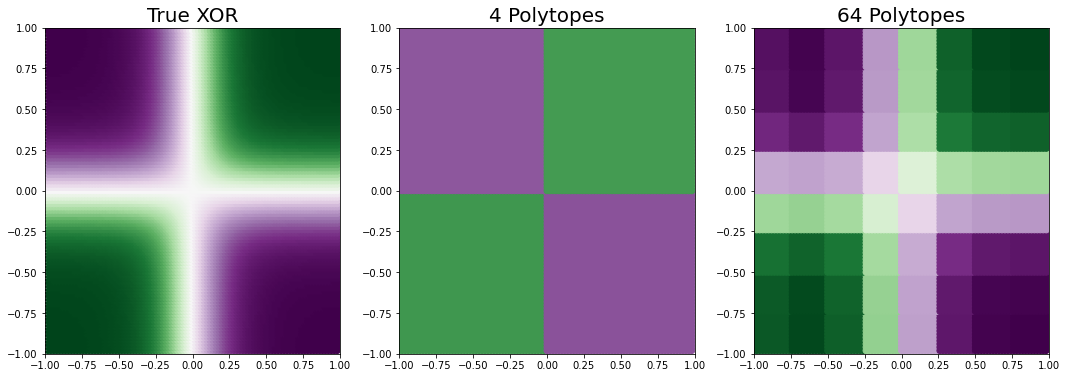

In [96]:
fig, ax = plt.subplots(1,3,figsize=(6*3,6))

label = ['True XOR'] + poly

for i, p in enumerate(label):

    if i == 0:
        ax[i].scatter(tr[:,0], tr[:,1], c=tr[:,2], vmin=0, vmax=1, cmap='PRGn')
        ax[i].set_title(p, fontsize=20)
    else:
        poly_train = get_polytope_points(N=p, grid_fill=tr)

        for pt in poly_train:
            ptt = pt[:,2].copy()
            ptt[:] = pt[:,2].mean()
            ax[i].scatter(pt[:,0],pt[:,1],c=ptt, vmin=0, vmax=1, cmap='PRGn')
    
    if i > 0:
        ax[i].set_title(f'{p} Polytopes', fontsize=20)
    
    ax[i].set_xlim(-rng,rng)
    ax[i].set_ylim(-rng,rng)

In [43]:
pA, pB = train_models(X=train[1][0], y=train[1][1], grid=grid)

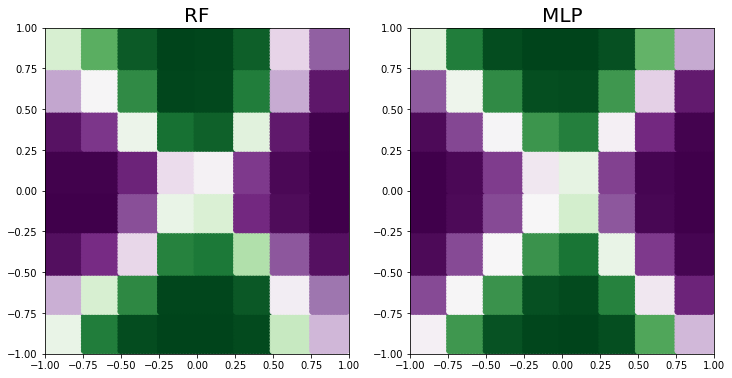

In [44]:
fig, ax = plt.subplots(1,2,figsize=(6*2,6))

for i, pAB in enumerate([pA[:,1], pB[:,1]]):

    pp = np.append(grid, pAB.reshape(-1,1), axis=1)
    poly_train = get_polytope_points(N=64, grid_fill=pp)

    for pt in poly_train:
        ptt = pt[:,2].copy()
        ptt[:] = pt[:,2].mean()
        ax[i].scatter(pt[:,0],pt[:,1],c=ptt, vmin=0, vmax=1, cmap='PRGn')
    
    ax[i].set_title(mtypes[i], fontsize=20)
    ax[i].set_xlim(-rng,rng)
    ax[i].set_ylim(-rng,rng)

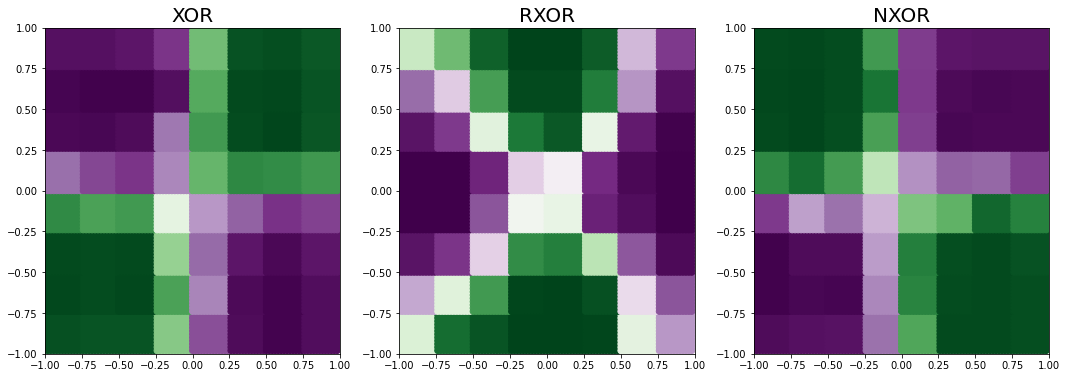

In [70]:
fig, ax = plt.subplots(1,3,figsize=(6*3,6))

for i, dt in enumerate(dtypes):

    pA, pB = train_models(X=train[i][0], y=train[i][1], grid=grid)

    pp = np.append(grid, pA[:,1].reshape(-1,1), axis=1)
    poly_train = get_polytope_points(N=64, grid_fill=pp)

    for pt in poly_train:
        ptt = pt[:,2].copy()
        ptt[:] = pt[:,2].mean()
        ax[i].scatter(pt[:,0],pt[:,1],c=ptt, vmin=0, vmax=1, cmap='PRGn')
    
    ax[i].set_title(dtypes[i], fontsize=20)
    ax[i].set_xlim(-rng,rng)
    ax[i].set_ylim(-rng,rng)

In [45]:
pp2 = np.append(test[1][0],test[1][1].reshape(-1,1),axis=1)
poly_test = get_polytope_points(N=64, grid_fill=pp2)

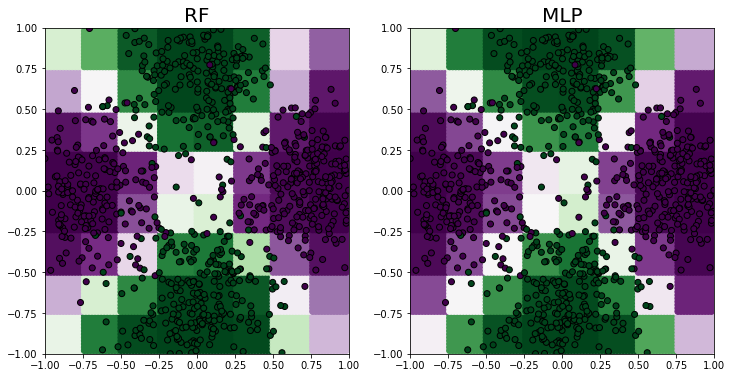

In [46]:
fig, ax = plt.subplots(1,2,figsize=(6*2,6))

for i, pAB in enumerate([pA[:,1], pB[:,1]]):

    pp = np.append(grid, pAB.reshape(-1,1), axis=1)
    poly_train = get_polytope_points(N=64, grid_fill=pp)

    for pt in poly_train:
        ptt = pt[:,2].copy()
        ptt[:] = pt[:,2].mean()
        ax[i].scatter(pt[:,0],pt[:,1],c=ptt, vmin=0, vmax=1, cmap='PRGn')

    for pt in poly_test:
        ptt = pt[:,2].copy()
        ax[i].scatter(pt[:,0],pt[:,1],c=ptt, vmin=0, vmax=1, cmap='PRGn', edgecolors='black')
    
    ax[i].set_title(mtypes[i], fontsize=20)
    ax[i].set_xlim(-rng,rng)
    ax[i].set_ylim(-rng,rng)

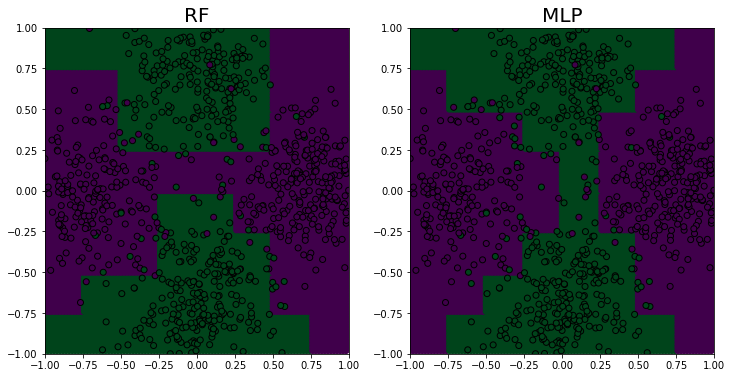

In [48]:
fig, ax = plt.subplots(1,2,figsize=(6*2,6))

for i, pAB in enumerate([pA[:,1], pB[:,1]]):

    pp = np.append(grid, pAB.reshape(-1,1), axis=1)
    poly_train = get_polytope_points(N=64, grid_fill=pp)

    for pt in poly_train:
        ptt = pt[:,2].copy()
        ptt[:] = np.argmax([0.5,pt[:,2].mean()])
        ax[i].scatter(pt[:,0],pt[:,1],c=ptt, vmin=0, vmax=1, cmap='PRGn')

    for pt in poly_test:
        ptt = pt[:,2].copy()
        ax[i].scatter(pt[:,0],pt[:,1],c=ptt, vmin=0, vmax=1, cmap='PRGn', edgecolors='black')
    
    ax[i].set_title(mtypes[i], fontsize=20)
    ax[i].set_xlim(-rng,rng)
    ax[i].set_ylim(-rng,rng)

In [15]:
def calculate_risk(pA, pB, verbose=False):

    error = 0
    total = 0

    for pp, pp_test in zip(pA, pB):
        for ppt in pp_test:
            
            total += 1
            error += int(np.argmax([0.5, pp[:,2].mean()]) != int(ppt[2]))

            if verbose:
                print(cnt, np.argmax([0.5, pp[:,2].mean()]), int(ppt[2]), int(np.argmax([0.5, pp[:,2].mean()]) != int(ppt[2])))

    return error/total

In [16]:
calculate_risk(pA=poly_train, pB=poly_test)

0.07847533632286996

#### Run the experiment
Do this for [RF, DN] with [XOR, RXOR, NXOR] over different sample size between [4, 64] polytopes

In [17]:
df_risk = pd.DataFrame(columns=['N', 'Polytope', 'Dataset', 'Model', 'Risk'])
df_risk

,N,Polytope,Dataset,Model,Risk


In [18]:
for n in N:
    train = generate_data(N=n)
    test  = generate_data(N=n)

    for p in poly:
        for i, d in enumerate(dtypes):
            pred_rf, pred_mlp = train_models(X=train[i][0], y=train[i][1], grid=grid)
            X_test = np.append(test[i][0], test[i][1].reshape(-1,1), axis=1)
            poly_test = get_polytope_points(N=p, grid_fill=X_test)

            for j, pred in enumerate([pred_rf, pred_mlp]):
                X_train = np.append(grid, pred[:,1].reshape(-1,1), axis=1)
                poly_train = get_polytope_points(N=p, grid_fill=X_train)
                risk = calculate_risk(pA=poly_train, pB=poly_test)
                # print(n, p, d, ['rf','mlp'][j], risk)
                df_risk.loc[len(df_risk)] = [n,p,d,mtypes[j],risk]

In [19]:
df_risk

,N,Polytope,Dataset,Model,Risk
0,1000,4,XOR,RF,0.038582
1,1000,4,XOR,MLP,0.038582
2,1000,4,RXOR,RF,0.512557
3,1000,4,RXOR,MLP,0.512557
4,1000,4,NXOR,RF,0.046680
5,1000,4,NXOR,MLP,0.046680
6,1000,64,XOR,RF,0.038582
7,1000,64,XOR,MLP,0.038582
8,1000,64,RXOR,RF,0.067352
9,1000,64,RXOR,MLP,0.066210


In [26]:
grouped = df_risk.groupby(['Dataset', 'Polytope', 'Model']).agg(lambda x:list(x))
grouped

N  \
Dataset Polytope Model                                     
NXOR    4        MLP    [1000, 2000, 5000, 10000, 50000]   
                 RF     [1000, 2000, 5000, 10000, 50000]   
        64       MLP    [1000, 2000, 5000, 10000, 50000]   
                 RF     [1000, 2000, 5000, 10000, 50000]   
RXOR    4        MLP    [1000, 2000, 5000, 10000, 50000]   
                 RF     [1000, 2000, 5000, 10000, 50000]   
        64       MLP    [1000, 2000, 5000, 10000, 50000]   
                 RF     [1000, 2000, 5000, 10000, 50000]   
XOR     4        MLP    [1000, 2000, 5000, 10000, 50000]   
                 RF     [1000, 2000, 5000, 10000, 50000]   
        64       MLP    [1000, 2000, 5000, 10000, 50000]   
                 RF     [1000, 2000, 5000, 10000, 50000]   

                                                                     Risk  
Dataset Polytope Model                                                     
NXOR    4        MLP    [0.046680497925311204, 0.04151339989490278, 0....  
                 RF     [0.046680497925311204, 0.04151339989490278, 0....  
        64       MLP    [0.046680497925311204, 0.04151339989490278, 0....  
                 RF     [0.046680497925311204, 0.04151339989490278, 0....  
RXOR    4        MLP    [0.5125570776255708, 0.4988826815642458, 0.502...  
                 RF     [0.5125570776255708, 0.4720670391061452, 0.502...  
        64       MLP    [0.06621004566210045, 0.07597765363128492, 0.0...  
                 RF     [0.06735159817351598, 0.07486033519553073, 0.0...  
XOR     4        MLP    [0.03858185610010428, 0.05099894847528917, 0.0...  
                 RF     [0.03858185610010428, 0.05099894847528917, 0.0...  
        64       MLP    [0.03858185610010428, 0.05099894847528917, 0.0...  
                 RF     [0.03858185610010428, 0.05099894847528917, 0.0...

In [32]:
grouped['Risk']

Dataset  Polytope  Model
NXOR     4         MLP      [0.046680497925311204, 0.04151339989490278, 0....
                   RF       [0.046680497925311204, 0.04151339989490278, 0....
         64        MLP      [0.046680497925311204, 0.04151339989490278, 0....
                   RF       [0.046680497925311204, 0.04151339989490278, 0....
RXOR     4         MLP      [0.5125570776255708, 0.4988826815642458, 0.502...
                   RF       [0.5125570776255708, 0.4720670391061452, 0.502...
         64        MLP      [0.06621004566210045, 0.07597765363128492, 0.0...
                   RF       [0.06735159817351598, 0.07486033519553073, 0.0...
XOR      4         MLP      [0.03858185610010428, 0.05099894847528917, 0.0...
                   RF       [0.03858185610010428, 0.05099894847528917, 0.0...
         64        MLP      [0.03858185610010428, 0.05099894847528917, 0.0...
                   RF       [0.03858185610010428, 0.05099894847528917, 0.0...
Name: Risk, dtype: object

#### Second polytope figure
2. given the polytopes (either 4 or 64), a plot of estimated Risk vs. sample size for XOR, XNOR, and RXOR.  i'm guessing the 64 will converge much slower than the 4 for XOR and XNOR, but for RXOR, it will converge to something with a far lower risk.

Text(0.5, 0, 'Sample Size')

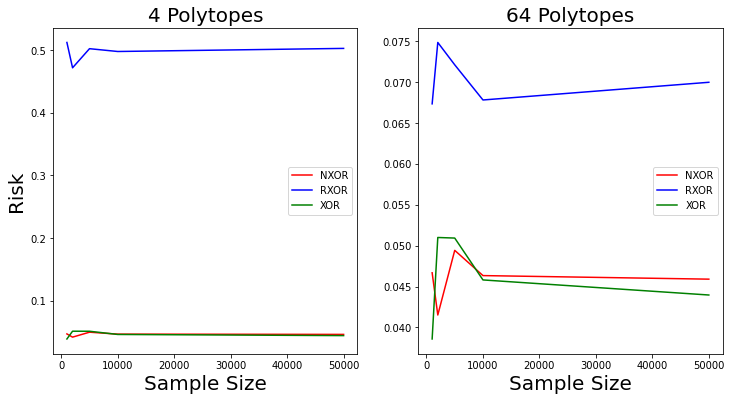

In [119]:
fig, ax = plt.subplots(1,2, figsize=(6*2,6))

ax[0].plot(N, grouped['Risk'][[1,3]][0], 'r-', label='NXOR')
ax[1].plot(N, grouped['Risk'][[1,3]][1], 'r-', label='NXOR')

ax[0].plot(N, grouped['Risk'][[5,7]][0], 'b-', label='RXOR')
ax[1].plot(N, grouped['Risk'][[5,7]][1], 'b-', label='RXOR')

ax[0].plot(N, grouped['Risk'][[9,11]][0], 'g-', label='XOR')
ax[1].plot(N, grouped['Risk'][[9,11]][1], 'g-', label='XOR')

ax[0].legend(loc='center right')
ax[1].legend(loc='center right')
ax[0].set_title('4 Polytopes', fontsize=20)
ax[1].set_title('64 Polytopes', fontsize=20)
ax[0].set_ylabel('Risk', fontsize=20)
ax[0].set_xlabel('Sample Size', fontsize=20)
ax[1].set_xlabel('Sample Size', fontsize=20)